--- 
## Operations visualization from different executions of TestBench

In [2]:
import glob
import os
import pandas as pd
import seaborn as snsß
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import seaborn as sns
import pandas as pd

In [4]:
EMPTY_FILES = False
RESULTS_FOLDER = "./reports/"

if EMPTY_FILES:
    if not os.path.exists(RESULTS_FOLDER):
        os.makedirs(RESULTS_FOLDER)
    for f in glob.glob(RESULTS_FOLDER + '/*'):
        os.remove(f)

In [5]:
#Fetch 
sns.set_theme(style="whitegrid")

#Fetch all the file names containing testBench executions
files = [f for f in listdir(RESULTS_FOLDER) if isfile(join(RESULTS_FOLDER, f))]
frames = []

#Merge all the testBench executions into one DataFrame
for file in files:
    run_df = pd.read_csv(RESULTS_FOLDER + "/" + file)
    run_df['Algorithm'] = file[file.rfind('_') + 1: file.rfind('.csv')] #Parsing algorithm type
    frames.append(run_df)
frames.sort(key = lambda x: x['Algorithm'][0])

def plot_executions(execution_frames, stats_list:list, y_unit, title):
    stats_list.append('Algorithm')
    df = pd.concat(execution_frames)[stats_list]

    #Rearrange DataFrame into suitable format for barplotting
    df_melted = df.melt('Algorithm', var_name="Statistic", value_name=y_unit)
    plt.figure(figsize=(20,10))

    #Plot the executions
    sns.barplot(data=df_melted, x="Statistic", y=y_unit, hue="Algorithm")
    plt.tick_params(rotation=90)
    plt.title(title)
    plt.show()

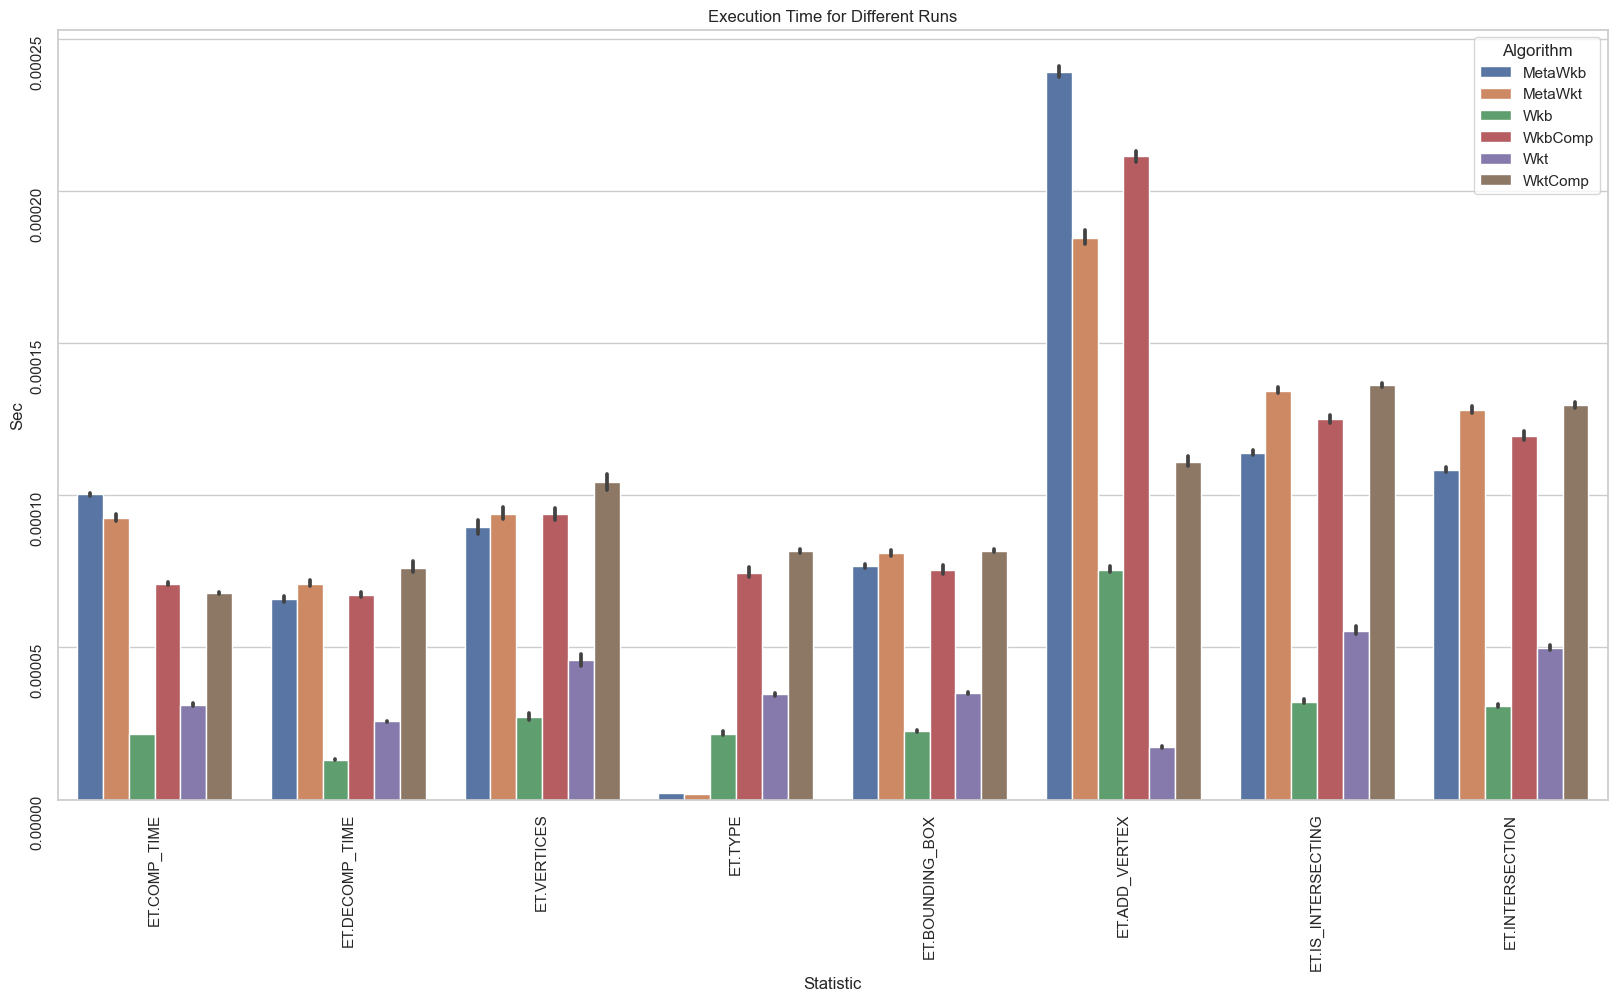

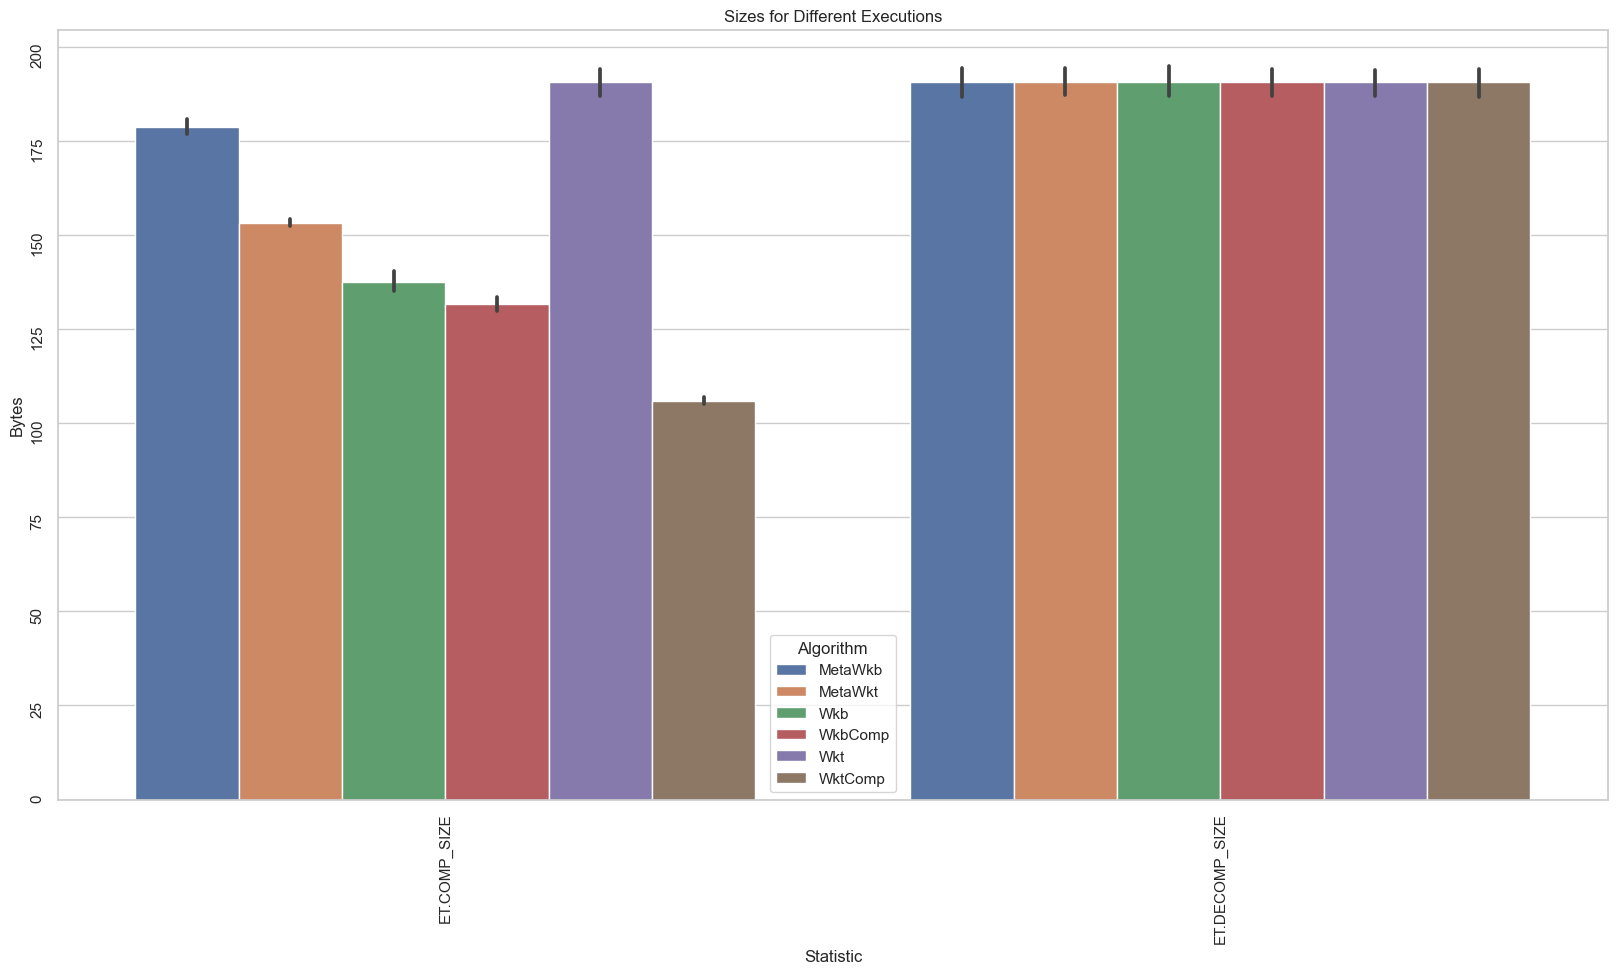

In [6]:
plot_executions(
    execution_frames=frames, 
    stats_list=["ET.COMP_TIME", "ET.DECOMP_TIME", "ET.VERTICES", "ET.TYPE", "ET.BOUNDING_BOX", "ET.ADD_VERTEX", "ET.IS_INTERSECTING", "ET.INTERSECTION"], 
    y_unit="Sec", 
    title="Execution Time for Different Runs")

plot_executions(
    execution_frames=frames, 
    stats_list=["ET.COMP_SIZE", "ET.DECOMP_SIZE"],
    y_unit="Bytes", 
    title="Sizes for Different Executions")